**Exploratory Data Analysis (EDA) of Diabetes Data**

In [1]:
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns  

%matplotlib inline

Diabetes data

In [2]:
url = 'https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv'
#url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv'
#url = 'https://gist.githubusercontent.com/ktisha/c21e73a1bd1700294ef790c56c8aec1f/raw/819b69b5736821ccee93d05b51de0510bea00294/pima-indians-diabetes.csv'
df = pd.read_csv(url)
#df = pd.DataFrame(data)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Data info:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Data description:

In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Glance at the outcome:

In [5]:
print(df.Outcome.unique())
df.Outcome.value_counts()

[1 0]


Outcome
0    500
1    268
Name: count, dtype: int64

Cleanse data (data cleaning):

- Check if there is any null value (remove if found): 

In [6]:
df1 = df.copy()
print('Checking null in data using `.isnull().any()`:')
print(df1.isnull().any())

print('Checking null in data using `.isnull().sum()`:')
nullrecord = df1.isnull().sum()
print(nullrecord)

nullrecord = nullrecord.to_list()
print('List of null record:',nullrecord,'\n')

null_flag = 0
for value in nullrecord:
    if value != 0:
        null_flag = 1
        print('Null value(s) exist(s)')
        break

if null_flag == 0: 
    print('No null record found!')
else:
    method = 0
    if method == 0:
      df1.dropna(how='any',axis=0, inplace=True) 
    else:
      df1 = df1[df1.isnull() == False] 
    print('Removed null records from data.')




Checking null in data using `.isnull().any()`:
Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool
Checking null in data using `.isnull().sum()`:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
List of null record: [0, 0, 0, 0, 0, 0, 0, 0, 0] 

No null record found!


- Check if there is any unrealistic zero value (remove if found):

In [7]:
print('Initial size of the data (row,col):',df1.shape)

# List of columns:
# 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 
# 'BMI', 'DiabetesPedigreeFunction', 'Age'

# Check for the Insuling column
print(df1.Insulin.eq(0).any())
print(df1.Glucose.eq(0).any())
print(df1.Pregnancies.eq(0).any())


# Now create a list excluding the Outcome column 
col_list = df1.columns.to_list()
print(col_list)
col_list.remove('Outcome') # removing coz we want Outcome to have 0 and 1's 
print(col_list)

# TODOs: (run a column loop)
''' 
for col in df1[col_list]:
    print(col)
    print(df1.col.head())
    if df1.col.eq(0).any():
           df1 = df1[df1[col] != 0]
'''
df1 = df1[ df1['Insulin'] != 0 ]  # Keeping only 
df1 = df1[ df1['Glucose'] != 0 ]
df1 = df1[df1.BloodPressure != 0 ]

print('Size of data after removing unnecessary zeros (row,col):',df1.shape)

    
    

    



Initial size of the data (row,col): (768, 9)
True
True
True
['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
Size of data after removing unnecessary zeros (row,col): (393, 9)


Data analysis and visualization

- Count plot

Text(0, 0.5, 'Count')

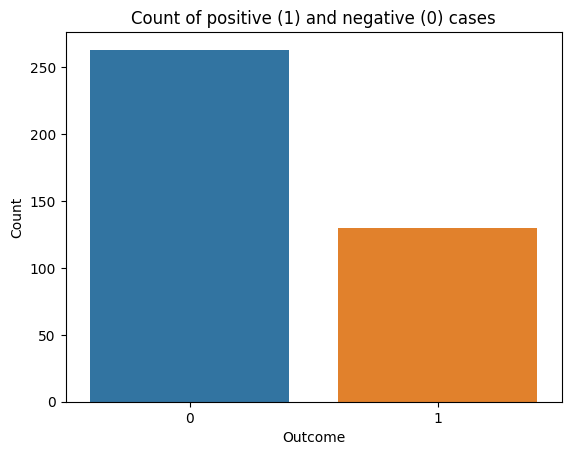

In [8]:
'''
df1.Outcome.plot.hist(bins=5)
import plotly.express as px
px.histogram(df, x='Outcome')
'''

sns.countplot(x='Outcome', data=df1).set(title='Count of positive (1) and negative (0) cases')
plt.ylabel('Count')



Bivariate analysis:

- Scatter plot

Observation: Outcome is more +ve when insulin is low (<400) and glucose level is high (>100).


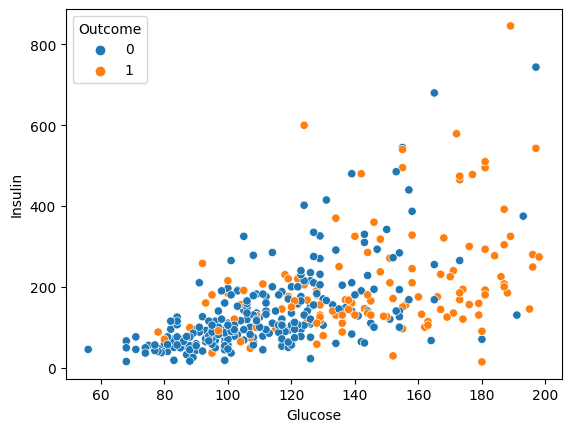

In [9]:
sns.scatterplot(data=df1, x='Glucose', y='Insulin', hue='Outcome')

print('Observation: Outcome is more +ve when insulin is low (<400) and glucose level is high (>100).')

- Pair plot

Pairplot of first four parameters


Pairplot of first four parameters


KDE stands for Kernel Density Estimation.
It estimates probability Density Function (PDF) around the data points.



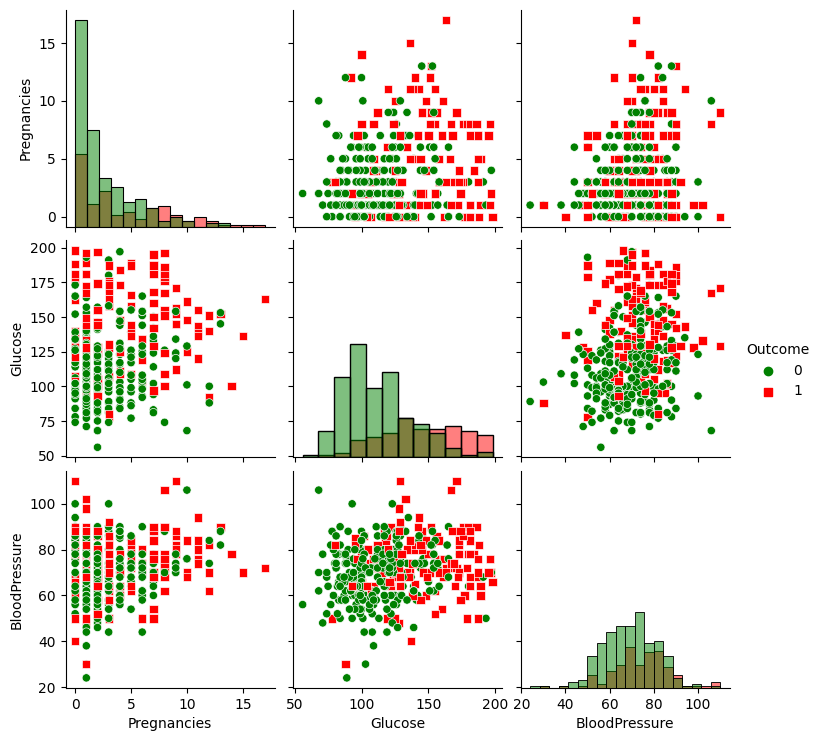

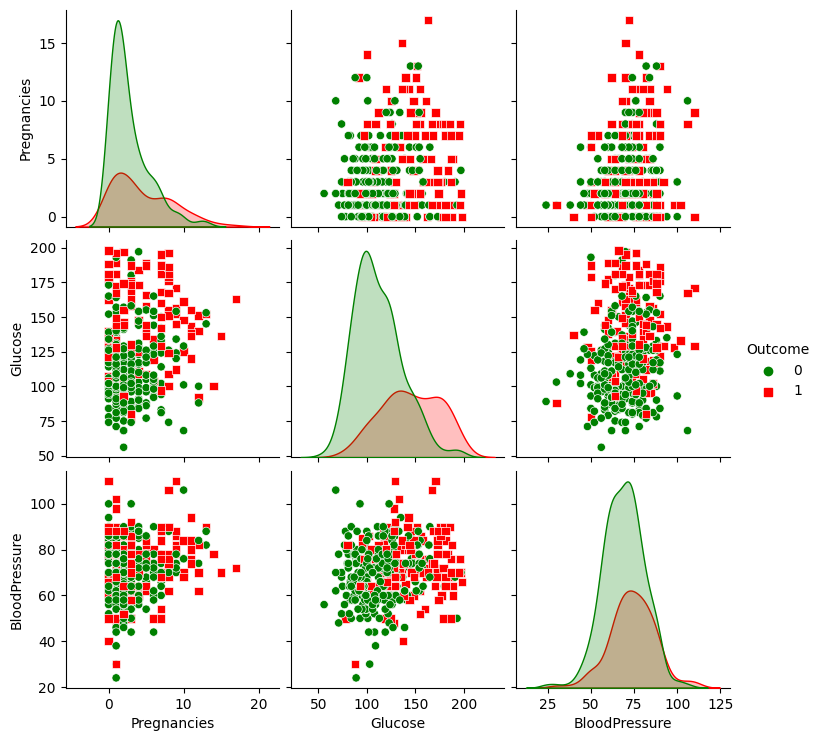

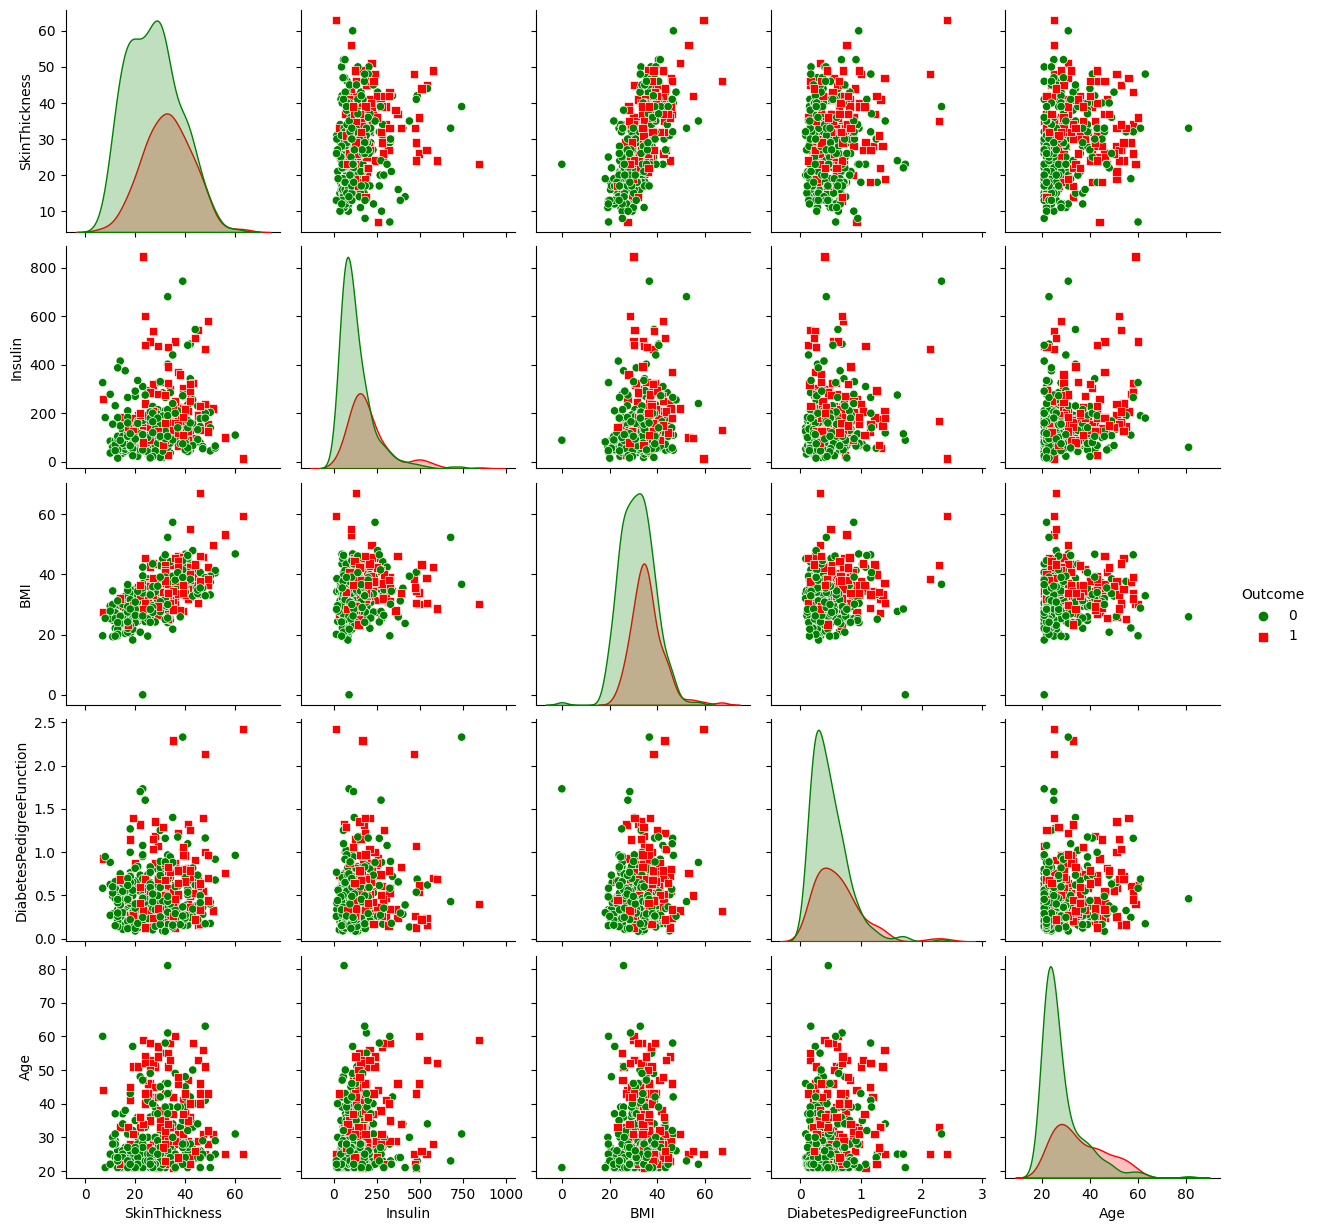

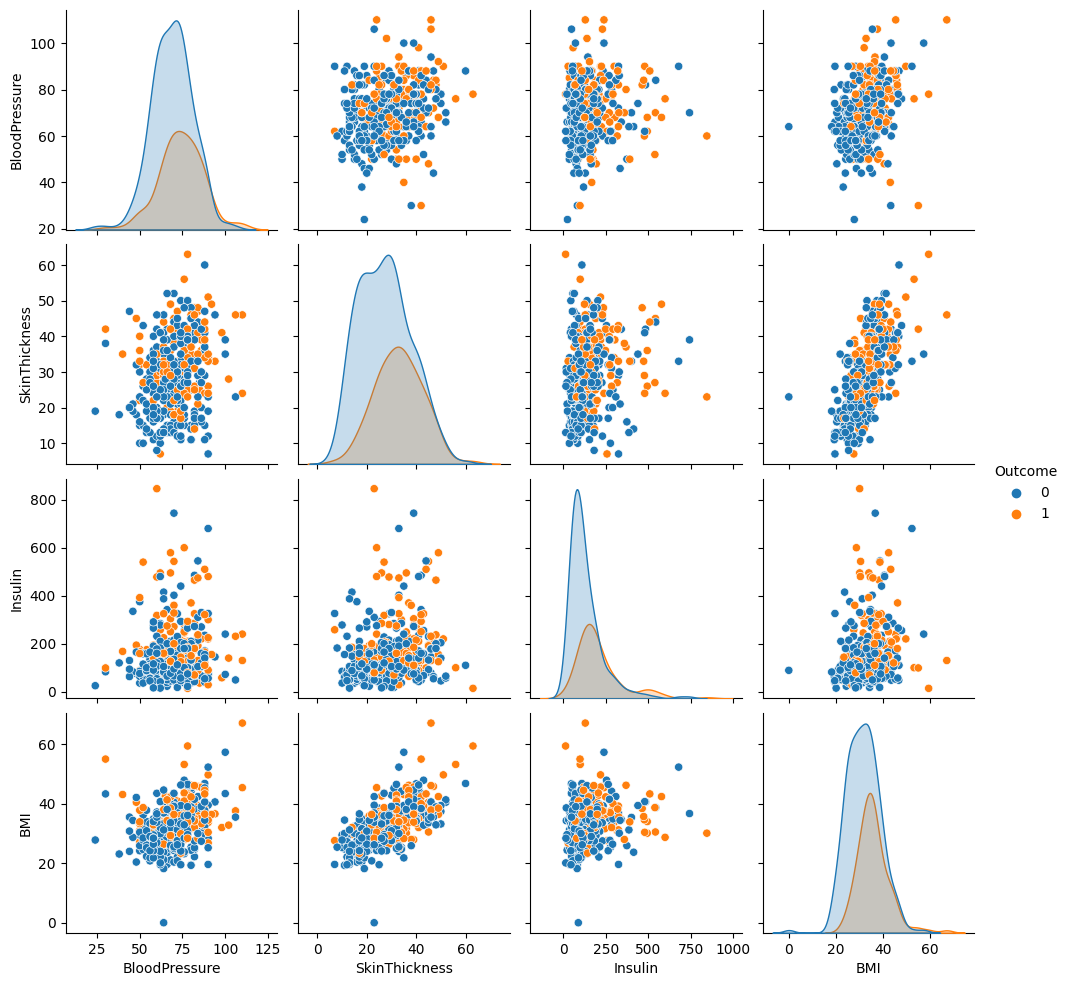

In [10]:
#sns.pairplot(df1, hue='Outcome')
#sns.pairplot(df1['Pregnancies', 'Glucose', 'BloodPressure'], hue='Outcome')
cols_to_plot = df1.columns[0:3].tolist() + ['Outcome'] # explicitly add the column "Outcome" to your list of columns to plot
rest_cols_to_plot = df1.columns[3:].tolist() # Rest of the columns
# See this: https://stackoverflow.com/questions/64556501/plot-only-some-columns-with-seaborn-pairplot
#sns.pairplot(df1[cols_to_plot], hue ='Outcome', markers=['o', 's'])
#sns.pairplot(df1[cols_to_plot], hue ='Outcome', palette='husl')
#palette = ['#00FF00', '#FF0000'] # <- hexacodes for green and red
palette = ['green', 'red']
print('Pairplot of first four parameters')
p0a = sns.pairplot(df1[cols_to_plot], hue ='Outcome', diag_kind='hist', palette=palette, markers=['o', 's'])
display(p0a)
p0b = sns.pairplot(df1[cols_to_plot], hue ='Outcome', diag_kind='kde', palette=palette, markers=['o', 's']) 
display(p0b)

print('Pairplot of first four parameters')
p1 = sns.pairplot(df1[rest_cols_to_plot], hue ='Outcome', diag_kind='kde', palette=palette, markers=['o', 's']) 
display(p1)
p2 = sns.pairplot(df1, vars=['BloodPressure', 'SkinThickness', 'Insulin', 'BMI'], hue='Outcome')
display(p2)

print("""KDE stands for Kernel Density Estimation.
It estimates probability Density Function (PDF) around the data points.\n""")

In [11]:
print('ANALYSIS: \n')
print("""
All diagonal plots show around a critical paramter values (e.g. BP, Glucose), higher
the risk of getting diagonsed with diabetes (+ve case, i.e. outcome = 1). The risk 
can be noticed by the hight of the peak of the KDE. Height of histograms also indicate the same.
The off-diagonal relations can be understood more clearly by a correlation map or heatmap (next topic).  
""")


ANALYSIS: 


All diagonal plots show around a critical paramter values (e.g. BP, Glucose), higher
the risk of getting diagonsed with diabetes (+ve case, i.e. outcome = 1). The risk 
can be noticed by the hight of the peak of the KDE. Height of histograms also indicate the same.
The off-diagonal relations can be understood more clearly by a correlation map or heatmap (next topic).  



Heatmap/Correlogram:

A heatmap is a 2-D visualization of relationship (or correlation) between two parameters in the form of a colored map. The intensity or hue
of the color determines the strength of the correlation. 

<Axes: >

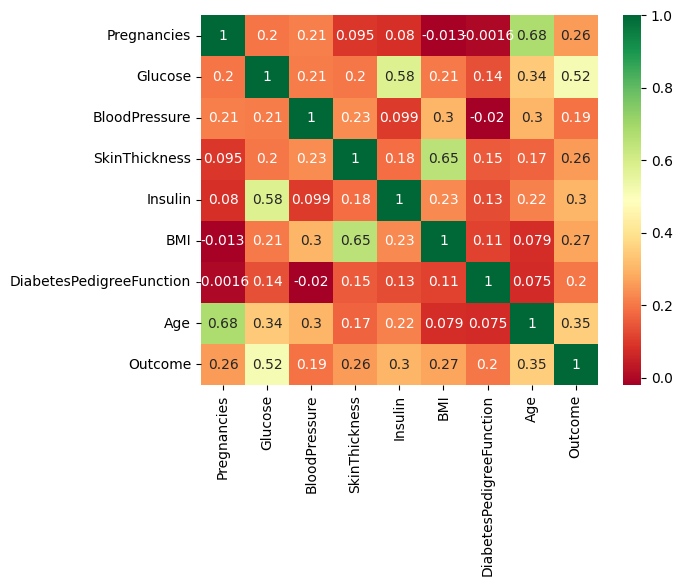

In [12]:
sns.heatmap(df1.corr(), annot=True, cmap='RdYlGn')
#sns.heatmap(df1.corr(), annot=True, cmap='RdYlGn')
#display(h0)


<Axes: >

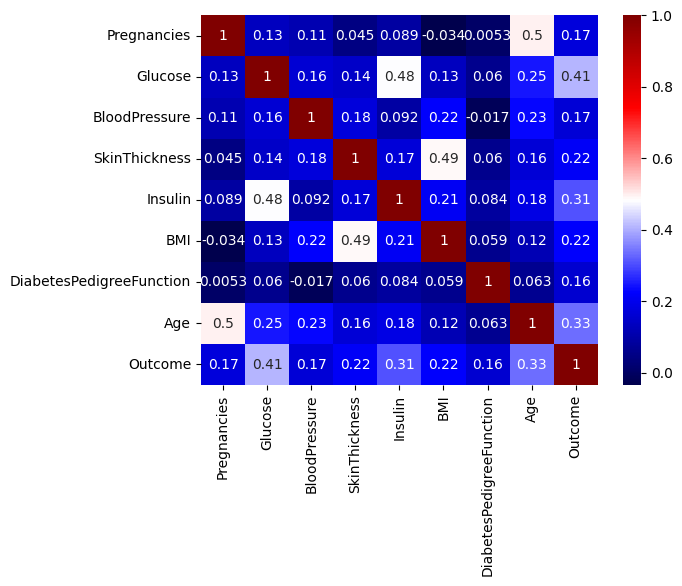

In [13]:
sns.heatmap(df1.corr(method='kendall'), annot=True, cmap='seismic') # methods available: Peasron (default), Spearman, and Kendall

In [14]:
print('ANALYSIS: \n')
print("""
Value close to 1 => strong correlation. 
Value close to 0 => weak correlation
Value close tp -1 => strong anti-correaltion.

Moderate correlation found between:
1) Age and pregnancies.
2) Glucose and Insuline.
3) BMI and Skin Thickness.
      
Mild anti-correlation found between:
1) Pregnancies and Insulin.
""")


ANALYSIS: 


Value close to 1 => strong correlation. 
Value close to 0 => weak correlation
Value close tp -1 => strong anti-correaltion.

Moderate correlation found between:
1) Age and pregnancies.
2) Glucose and Insuline.
3) BMI and Skin Thickness.
      
Mild anti-correlation found between:
1) Pregnancies and Insulin.



Univariate analysis:

Distribution

/var/folders/3m/pc44t30x60gd3bj_3f670_yw0000gn/T/ipykernel_18704/3129843294.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1.BloodPressure)


<Axes: xlabel='BloodPressure', ylabel='Density'>

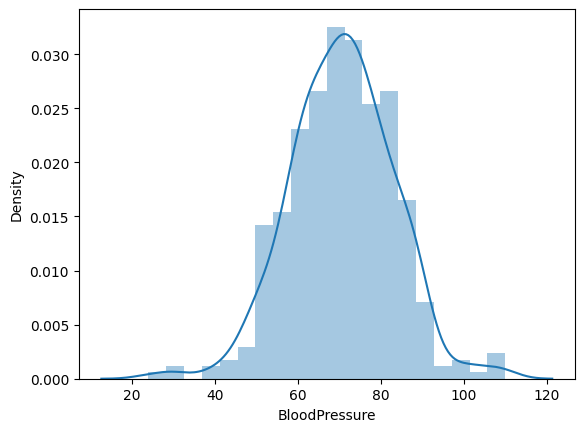

In [15]:
sns.distplot(df1.BloodPressure)

Box Plots

<Axes: xlabel='Outcome', ylabel='Glucose'>

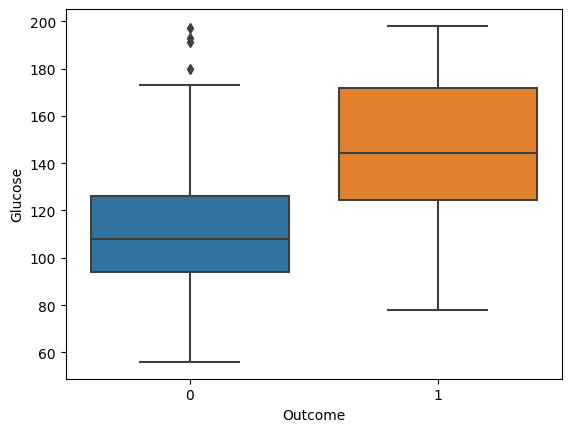

In [16]:
sns.boxplot(data=df1, x='Outcome', y='Glucose')

([<matplotlib.axis.YTick at 0x12d8ac750>,
 [Text(0, 50, '50'),
  Text(0, 70, '70'),
  Text(0, 90, '90'),
  Text(0, 110, '110'),
  Text(0, 130, '130'),
  Text(0, 150, '150'),
  Text(0, 170, '170'),
  Text(0, 190, '190'),
  Text(0, 210, '210'),
  Text(0, 230, '230'),
  Text(0, 250, '250'),
  Text(0, 270, '270'),
  Text(0, 290, '290'),
  Text(0, 310, '310'),
  Text(0, 330, '330')])

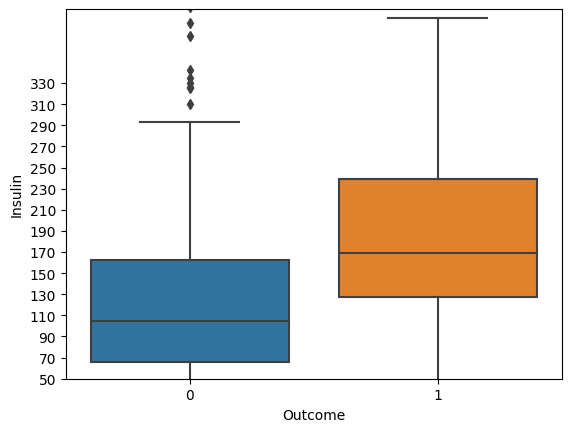

In [27]:
sns.boxplot(data=df1, x='Outcome', y='Insulin')
plt.ylim([50,400])
plt.yticks(range(50,350,20))

In [17]:
print('ANALYSIS: \n')
print("""
1) There are many outliers in the 0 Outcome data.
2) Glucose level higher/lower than 120 are more/less diabetic.   
""")

ANALYSIS: 


1) There are many outliers in the 0 Outcome data.
2) Glucose level higher/lower than 120 are more/less diabetic.   



(0.0, 72.0)

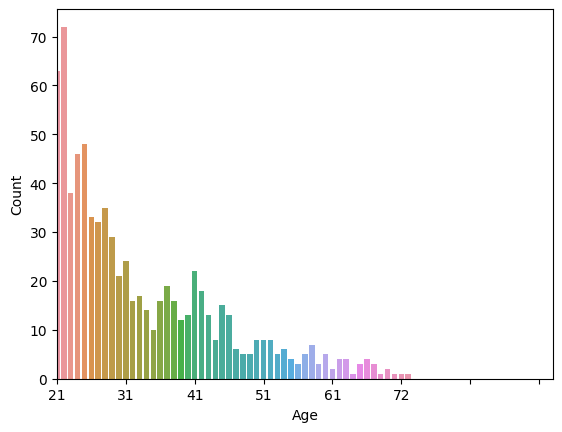

In [18]:
sns.countplot(x="Age",data=df)
#plt.set(xticks=range(len(df['Age'])), xticklabels=[i[0] for i in df.Age])
#plt.xticks(np.arange(0, 90, step=10))
plt.ylabel('Count')
plt.xticks(range(0, 90, 10)) # ^ above also works
plt.xlim([0,72]) # seems doesn't work correctly with Seaborn
#plt.xlim(left=-72)




Pie-chart:

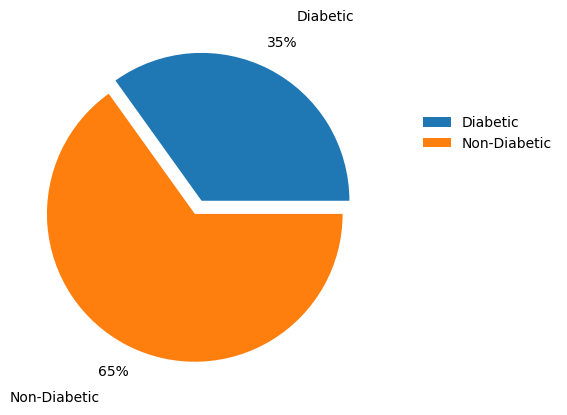

In [19]:
fig, ax = plt.subplots()

labels = ['Diabetic', 
         'Non-Diabetic']
percentages = [34.89, 65.10]
explode=(0.1,0)
ax.pie(percentages, explode=explode, labels=labels, autopct='%1.0f%%', 
       shadow=False, startangle=0,   
       pctdistance=1.2,labeldistance=1.4)
ax.legend(frameon=False, bbox_to_anchor=(1.5,0.8))
plt.show()

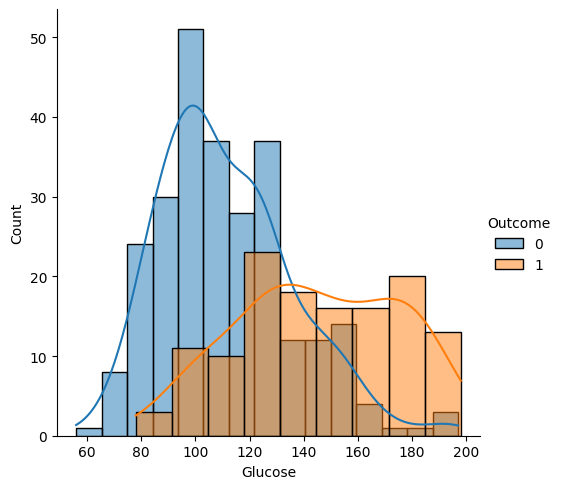

In [20]:
sns.FacetGrid(df1, hue='Outcome', height=5).map(sns.histplot, 'Glucose', kde=True).add_legend()
                                                

- Violin plot

Text(0.5, 9.444444444444438, 'Outcome (0 = Non-Diabetic or 1 = Diabetic) ')

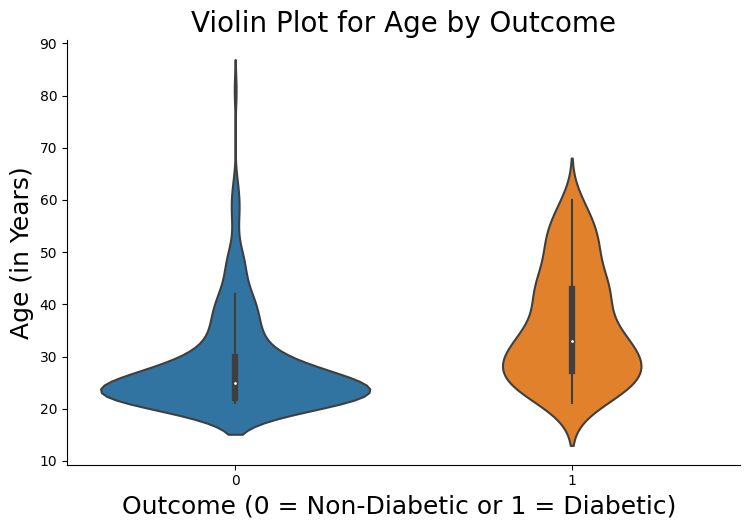

In [21]:
sns.catplot(x="Outcome", y="Age", data = df1, s = 5, height = 5, aspect = 3/2, kind = 'violin')
plt.title('Violin Plot for Age by Outcome', size = 20)
plt.ylabel('Age (in Years)', size = 18)
plt.xlabel('Outcome (0 = Non-Diabetic or 1 = Diabetic) ', size = 18)

In [22]:
# Nice comprehensive study can be found here: https://dhyay.github.io/